## Trabalho T3 - Aproximação de Funções: Interolação e ajuste por mínimos quadrados

### MTM 224 - Mét. Numéricos Computacionais

**Nome dos integrantes do grupo:**

### Questão 1
Considere os dados,
$$
\begin{array}{cccccc}
\hline
x    &1,6  &1,9  &2,5    &3,2   &3,9  &4,5 \\ \hline
f(x) &2,0  &8,0  &14,0   &15,5  &9,0  &2,1  \\
\hline
\end{array}
$$

(a) Calcule $f(2,9)$ usando polinômios interpoladores de Newton de segundo a quarto graus. Escolha a sequência de pontos que julgar mais adequada.

(b) Utilize a expressão

$$ R_n \cong (x-x_0)(x-x_1)...(x-x_n)f[x_0, x_1,...,x_n, x]$$

para fazer uma estimativa do erro em cada uma das previsões.


(c) Para o polinômio que forneceu o melhor resultado, use a fórmula de Lagrange com os mesmos pontos e compare o resultado. Comente o que você observou.

In [1]:
from typing import Callable
def newton_interpolation(xs: list, ys: list) -> Callable:
    n = len(xs)
    def p(x):
        xMultiplyElement = 1
        oElements = ys.copy()
        nextdElement = ys[0]
        result = nextdElement * xMultiplyElement
        for i in range(n-1):
          newOElements = []
          for j in range(len(oElements)-1):
            thisElement = oElements[j]
            nextElement = oElements[j+1]
            thisX = xs[j]
            nextX = xs[j+1+i]
            oCalculated = (nextElement-thisElement)/(nextX-thisX)
            newOElements.append(oCalculated)
          oElements = newOElements.copy()
          nextdElement = oElements[0]
          xMultiplyElement *= (x-xs[i])
          result += nextdElement*xMultiplyElement
        return result
    return p


xArray = [1.6, 1.9, 2.5, 3.2, 3.9, 4.5]
yArray = [2.0, 8.0, 14.0, 15.5, 9.0, 2.1]

p2 = newton_interpolation(xArray[:3], yArray[:3])
p3 = newton_interpolation(xArray[:4], yArray[:4])
p4 = newton_interpolation(xArray[:5], yArray[:5])
print("Letra a)")
print("Interpolação segundo grau: ")
print(p2(2.9))
print("Interpolação terceiro grau: ")
print(p3(2.9))
print("Interpolação quarto grau: ")
print(p4(2.9))

Letra a)
Interpolação segundo grau: 
13.555555555555548
Interpolação terceiro grau: 
15.20238095238095
Interpolação quarto grau: 
15.489056492162081


In [2]:
print("Letra b")
xs = [1.6, 1.9, 2.5, 3.2, 3.9, 4.5]
ys = [2.0, 8.0, 14.0, 15.5, 9.0, 2.1]

def divided_difference(xi: int, xj: int):
  if (xi == xj):
    return ys[xi]
  return (divided_difference(xi+1,xj)-divided_difference(xi,xj-1))/(xs[xj]-xs[xi])

def calculate_error(x: float, ordem: int, xs: list, ys: list):
  result = 1
  for i in range(ordem+1):
    result *= (x-xs[i])
  result*= divided_difference(0, ordem+1)
  return result

for i in range(1, 5):
  print("Erro p" + str(i),calculate_error(2.9, i, xs, ys))

Letra b
Erro p1 -14.444444444444462
Erro p2 1.6468253968254019
Erro p3 0.286675539781131
Erro p4 0.18760478473479175


In [3]:
print("Letra c (rodar letra a antes)")

xs = [1.6, 1.9, 2.5, 3.2, 3.9, 4.5]
ys = [2.0, 8.0, 14.0, 15.5, 9.0, 2.1]

def lagrange_interpolation(x_values, y_values, x):
    result = 0
    for i in range(len(y_values)):
        term = y_values[i]
        for j in range(len(x_values)):
            if j != i:
                term = term * (x - x_values[j]) / (x_values[i] - x_values[j])
        result += term
    return result

print("Lagrange: ")
print(lagrange_interpolation(xs, ys, 2.9))
print("Newton: ")
p5 = newton_interpolation(xs, ys)
print(p5(2.9))
# Resultados praticamente iguais, houve diferença apenas depois da décima quarta
# casa decimal

Letra c (rodar letra a antes)
Lagrange: 
15.676661276896871
Newton: 
15.676661276896873


### Questão 2
Os resultados da densidade da água $\rho$ para diferentes temperaturas são representados na tabela a seguir.
$$
\begin{array}{cccccccc}
\hline
T(^\circ C)   &-10    &0      &10     &15     &20      &30      &60\\ \hline
\rho \, (g/cm^3)        &0,9981 &0,9998 &0,9997 &0,9991 &0,9982  &0,9957  &0,9832 \\
\hline
\end{array}
$$
Use interpolação para estimar $\rho(17,5)$  e para estimar a temperatura $T$ para que a densidade seja $0.9995$ g/cm$^3$. Justifique as escolhas do método e pontos utilizado.



In [4]:
xs = [-10, 0, 10, 15, 20, 30, 60]
ys = [0.9981, 0.9998, 0.9997, 0.9991, 0.9982, 0.9957, 0.9832]

p = newton_interpolation(xs, ys)
p_reverse = newton_interpolation(ys, xs)

print("p(17.5) = ", p(17.5))
print("T para 0.9995 = ", p_reverse(0.9995))


p(17.5) =  0.9986843004014757
T para 0.9995 =  12.068007533705737


### QUESTÃO 3

Considere a função
$$f(x)=\frac{3.17}{0.71 + 9.81x^2}$$

(a) Aproxime o valor de $f(1.78)$ usando um polinômio interpolador de grau 3 no intervalo [1, 2] e compare com o valor da função. Mostre o gráfico do polinômio e da função nesse intervalo.

(b) Repita o item anterior, mas dessa vez utilize um polinômio de grau 10 no intervalo [-2,2] e comente o que você observou.

(c)Pesquise e responda o que é "Fenômeno de Runge".

Letra a)
0.10001465358038887
0.09971060647828302


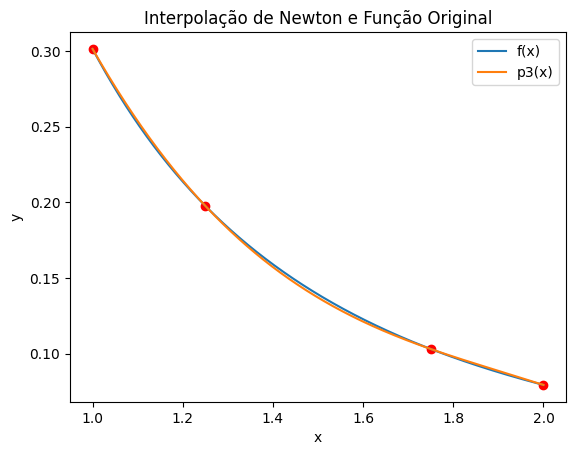

In [5]:
print("Letra a)")
import matplotlib.pyplot as plt
import numpy as np

def f(x):
  return 3.17/(0.71 + 9.81*x**2)

xs = [1, 1.25, 1.75, 2]
ys = [f(xs[i]) for i in range(len(xs))]

p3 = newton_interpolation(xs, ys)
print(p3(1.78))
print(f(1.78))

x_values_plot = np.linspace(1, 2, 1000)
y_values_f = [f(x) for x in x_values_plot]
y_values_p3 = [p3(x) for x in x_values_plot]

plt.plot(x_values_plot, y_values_f, label='f(x)')
plt.plot(x_values_plot, y_values_p3, label='p3(x)')
plt.scatter(xs, ys, color='red')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.title('Interpolação de Newton e Função Original')
plt.show()

Letra b)
0.542183495212285
0.09971060647828302


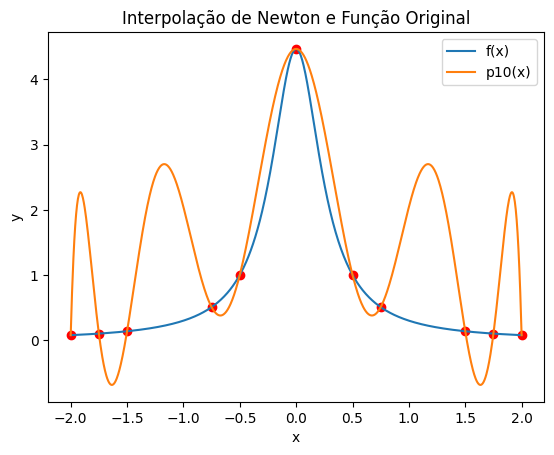

In [6]:
print("Letra b)")
import matplotlib.pyplot as plt
import numpy as np

def f(x):
  return 3.17/(0.71 + 9.81*x**2)

xs = [-2, -1.75, -1.5, -0.75, -0.5, 0, 0.5, 0.75, 1.5, 1.75, 2]
ys = [f(x) for x in xs]

p10 = newton_interpolation(xs, ys)
print(p10(1.78))
print(f(1.78))

x_values_plot = np.linspace(-2, 2, 1000)
y_values_f = [f(x) for x in x_values_plot]
y_values_p10 = [p10(x) for x in x_values_plot]

plt.plot(x_values_plot, y_values_f, label='f(x)')
plt.plot(x_values_plot, y_values_p10, label='p10(x)')
plt.scatter(xs, ys, color='red')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.title('Interpolação de Newton e Função Original')
plt.show()

# Com essa aproximação fica claro que ocorre o Fênomeno Ruge, no qual usar um
# polinômio de grau muito alto pode diminuir a precisão da aproximação

# Letra c)
## Fênomeno Ruge
O "Fenômeno de Runge" refere-se a um comportamento observado em métodos de interpolação polinomial, especialmente na escolha dos pontos de interpolação. Este fenômeno foi identificado pelo matemático alemão Carl David Tolmé Runge.

O Fenômeno de Runge ocorre quando se tenta interpolar uma função contínua usando um polinômio de alta ordem, e a qualidade da interpolação piora à medida que se aumenta o grau do polinômio. Isso significa que, ao adicionar mais pontos de interpolação ou aumentar o grau do polinômio, a função interpolada pode começar a oscilar drasticamente entre os pontos escolhidos, resultando em uma aproximação menos precisa.

### QUESTÃO 4
Dados os seguintes pontos tabelados
$$
\begin{array}{cccccccccc}
\hline
x_i    &0.01  &0.99  &2.02  &3.01  &3.97  &5.01  &5.93  &6.99  &8.08  \\
\hline
f(x_i) &0.000 &1.621  &1.782  &0.915 &-0.122 &-0.225 &1.099 &2.728 &3.534\\
\hline
\end{array}
$$

(a) Encontre o polinômio de grau 3 que melhor se ajusta aos pontos dados

(b) Encontre a função do tipo $g(x)=a_1x + a_2 sen(x)$ que melhor se ajusta

(c) Decida qual das duas funções acima é a melhor escola para estimar $f(11.5)$. Jusfifique sua resosta.


Letra a)
(0.01, 0.99, 2.02, 3.01) = -0.0008654535114961198
(0.01, 0.99, 2.02, 3.97) = -0.08394899061512542
(0.01, 0.99, 2.02, 5.01) = -0.17395615581072377
(0.01, 0.99, 2.02, 5.93) = -0.25357787886836847
(0.01, 0.99, 2.02, 6.99) = -0.34531595108695917
(0.01, 0.99, 2.02, 8.08) = -0.4396503838400382
(0.01, 0.99, 3.01, 3.97) = 0.0008566223532155472
(0.01, 0.99, 3.01, 5.01) = 0.0017750628143951026
(0.01, 0.99, 3.01, 5.93) = 0.002587529376207786
(0.01, 0.99, 3.01, 6.99) = 0.003523632153948488
(0.01, 0.99, 3.01, 8.08) = 0.004486228406530907
(0.01, 0.99, 3.97, 5.01) = 0.1721810929963287
(0.01, 0.99, 3.97, 5.93) = 0.2509903494921607
(0.01, 0.99, 3.97, 6.99) = 0.3417923189330107
(0.01, 0.99, 3.97, 8.08) = 0.4351641554335074
(0.01, 0.99, 5.01, 5.93) = 0.5200934046177762
(0.01, 0.99, 5.01, 6.99) = 0.7082500629436611
(0.01, 0.99, 5.01, 8.08) = 0.9017319097127314
(0.01, 0.99, 5.93, 6.99) = 1.0324242211069288
(0.01, 0.99, 5.93, 8.08) = 1.3144649231135836
(0.01, 0.99, 6.99, 8.08) = 1.79000513420587
(0

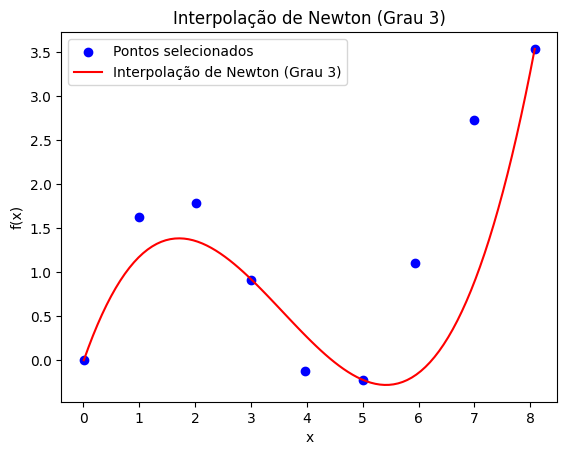

In [7]:
print("Letra a)")
from itertools import combinations
import math
xs = [0.01, 0.99, 2.02, 3.01, 3.97, 5.01, 5.93, 6.99, 8.08]
ys = [0.000, 1.621, 1.782, 0.915, -0.122, -0.225, 1.099, 2.728, 3.534]

minNum = math.inf
comboMin = []
for combo in combinations(xs, 4):
    xArray = combo
    yArray = [ys[xs.index(combo[i])] for i in range(4)]
    errors = [abs(calculate_error(xs[i], 3, xArray, yArray)) for i in range(len(xs))]
    error = sum(errors)
    if (error < minNum):
      minNum = error
      comboMin = combo
    print(f"{combo} = {calculate_error(3, 3, xArray, yArray)}")
print("Melhor combinação de pontos: ",comboMin)

xArray = comboMin
yArray = [ys[xs.index(comboMin[i])] for i in range(4)]

func_metodo_1 = newton_interpolation(xArray, yArray)

x_range = np.linspace(min(xs), max(xs), 100)
y_interpolated = [func_metodo_1(x) for x in x_range]

plt.scatter(xs, ys, color='blue', label='Pontos selecionados')
plt.plot(x_range, y_interpolated, color='red', label='Interpolação de Newton (Grau 3)')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Interpolação de Newton (Grau 3)')
plt.legend()
plt.show()


Letra b)


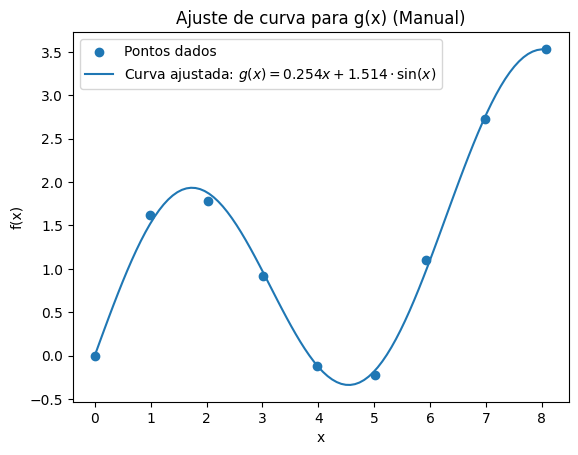

In [11]:
print("Letra b)")

import numpy as np
import matplotlib.pyplot as plt

xi = np.array([0.01, 0.99, 2.02, 3.01, 3.97, 5.01, 5.93, 6.99, 8.08])
fi = np.array([0.000, 1.621, 1.782, 0.915, -0.122, -0.225, 1.099, 2.728, 3.534])

def func(params, x):
    a1, a2 = params
    return a1 * x + a2 * np.sin(x)

def error(params):
    return np.sum((func(params, xi) - fi)**2)

def gradient(params):
    a1, a2 = params
    d_a1 = 2 * np.sum(xi * (func(params, xi) - fi))
    d_a2 = 2 * np.sum(np.sin(xi) * (func(params, xi) - fi))
    return np.array([d_a1, d_a2])

def gradient_descent(params, learning_rate, iterations):
    for _ in range(iterations):
        params -= learning_rate * gradient(params)
    return params

initial_params = np.zeros(2)

learning_rate = 0.001
iterations = 10000

optimized_params = gradient_descent(initial_params, learning_rate, iterations)

a1, a2 = optimized_params

x_fit = np.linspace(min(xi), max(xi), 100)
y_fit = func(optimized_params, x_fit)


def func_metodo_2(x):
  return func(optimized_params, x)


plt.scatter(xi, fi, label='Pontos dados')
plt.plot(x_fit, y_fit, label=f'Curva ajustada: $g(x)={a1:.3f}x + {a2:.3f} \cdot \sin(x)$')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()
plt.title('Ajuste de curva para g(x) (Manual)')
plt.show()


In [14]:
print("Letra c)")

xs = [0.01, 0.99, 2.02, 3.01, 3.97, 5.01, 5.93, 6.99, 8.08]
ys = [0.000, 1.621, 1.782, 0.915, -0.122, -0.225, 1.099, 2.728, 3.534]

def calculate_error_of_function_and_points(func: Callable, xs: list, ys: list):
  total_error = 0
  for i in range(len(xs)):
    total_error += abs(func(xs[i]) - ys[i])
  average_error = total_error/len(xs)
  return average_error

print("Erro método 1: ", calculate_error_of_function_and_points(func_metodo_1, xs, ys))
print("Erro método 2: ", calculate_error_of_function_and_points(func_metodo_2, xs, ys))
print("A segunda função é uma melhor aproximação porque tem um erro médio menor")


Letra c)
Erro método 1:  0.4913164400149944
Erro método 2:  0.05358437786705122
A segunda função é uma melhor aproximação porque tem um erro médio menor


### QUESTÃO 5
 Linearize o modelo matemático
$$ y = \alpha x e^{\beta x}$$
e encontre os parâmetros $\alpha$ e $\beta$ que fornecem o melhor ajute com base nos seguintes dados.  
$$
\begin{array}{cccccccccc}
\hline
x    &0,1 &0,2 &0,4 &0,6  &0,9 &1,1 &1,5 &1,7 &1,8\\
\hline
y    &0,75 &1,25 &1,45 &1,25 &0,85 &0,55 &0,35 &0,19 &0,18\\
\hline
\end{array}
$$

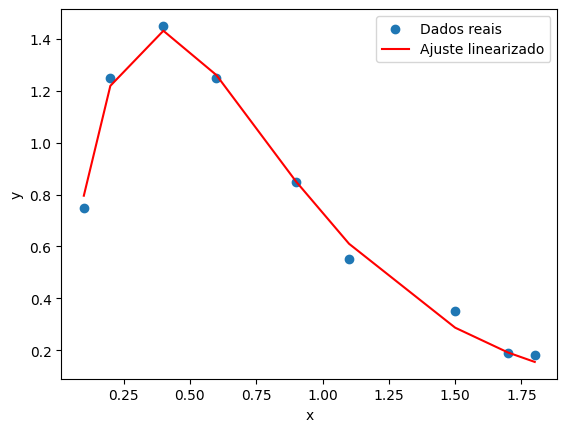

Parâmetro alpha otimizado: 10.382356836888144
Parâmetro beta otimizado: -2.6630820197989222


In [10]:
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt

x_data = np.array([0.1, 0.2, 0.4, 0.6, 0.9, 1.1, 1.5, 1.7, 1.8])
y_data = np.array([0.75, 1.25, 1.45, 1.25, 0.85, 0.55, 0.35, 0.19, 0.18])

def linearized_model(x, alpha, beta):
    return alpha * x * np.exp(beta * x)

params, covariance = curve_fit(linearized_model, x_data, y_data)

alpha_opt, beta_opt = params

y_pred = linearized_model(x_data, alpha_opt, beta_opt)

plt.scatter(x_data, y_data, label='Dados reais')
plt.plot(x_data, y_pred, label='Ajuste linearizado', color='red')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

print(f'Parâmetro alpha otimizado: {alpha_opt}')
print(f'Parâmetro beta otimizado: {beta_opt}')
